In [45]:
import pandas as pd
import matplotlib.pyplot as plt


In [46]:
df = pd.read_csv('data.tsv', sep='\t', encoding='utf-8',error_bad_lines=False,index_col=False)

b'Skipping line 4793: expected 10 fields, saw 11\nSkipping line 5508: expected 10 fields, saw 11\nSkipping line 6086: expected 10 fields, saw 11\nSkipping line 7489: expected 10 fields, saw 11\nSkipping line 8084: expected 10 fields, saw 11\nSkipping line 9580: expected 10 fields, saw 11\n'


In [47]:
df.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [48]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText

In [49]:
df['REVIEW_TEXT'] = preprocess(df['REVIEW_TEXT'])

In [50]:
from textblob import TextBlob
df['polarity'] = df['REVIEW_TEXT'].map(lambda text: TextBlob(text).sentiment.polarity)

In [57]:
df_biased = df[df.LABEL == '__label1__']

In [59]:
df_Unbiased=df[df.LABEL == '__label2__']

In [60]:
df['polarity'].head()               

0   -0.300000
1    0.219226
2    0.347143
3   -0.088542
4    0.145833
Name: polarity, dtype: float64

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

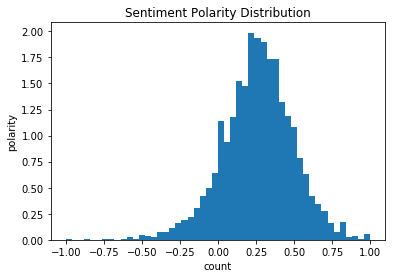

In [62]:
plt.hist(df_biased['polarity'], normed=True,bins=50)
plt.xlabel('count')
plt.ylabel('polarity')
plt.title('Sentiment Polarity Distribution')

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

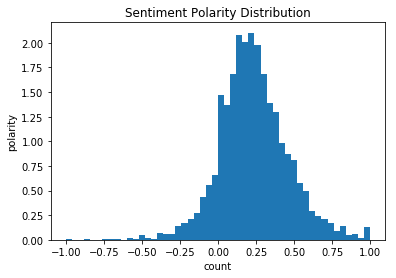

In [63]:
plt.hist(df_Unbiased['polarity'], normed=True,bins=50)
plt.xlabel('count')
plt.ylabel('polarity')
plt.title('Sentiment Polarity Distribution')

Text(0.5, 1.0, 'Customer rating distribution')

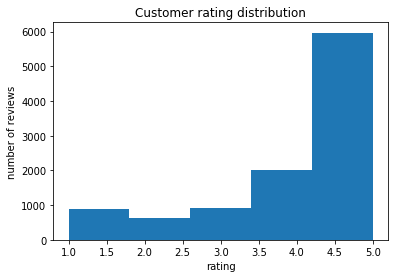

In [64]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

plt.hist(df_biased['RATING'],bins=5)
plt.xlabel('rating')
plt.ylabel('number of reviews')
plt.title('Customer rating distribution')

Text(0.5, 1.0, 'Customer rating distribution')

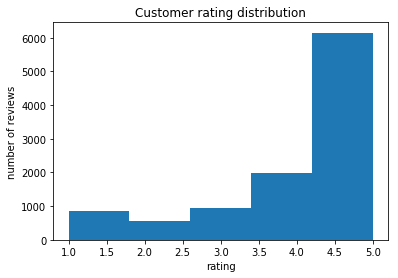

In [67]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

plt.hist(df_Unbiased['RATING'],bins=5)
plt.xlabel('rating')
plt.ylabel('number of reviews')
plt.title('Customer rating distribution')

/Users/anjalid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


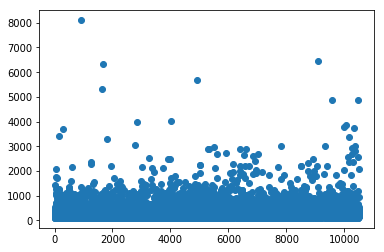

In [68]:
df_biased['review_len'] = df_biased['REVIEW_TEXT'].apply(len)
df_biased['review_len'].head()
plt.scatter(df_biased['DOC_ID'],df_biased['review_len'])

/Users/anjalid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


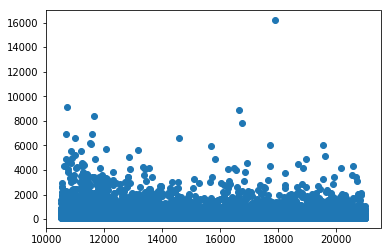

In [70]:
df_Unbiased['review_len'] = df_Unbiased['REVIEW_TEXT'].apply(len)
df_Unbiased['review_len'].head()
plt.scatter(df_Unbiased['DOC_ID'],df_Unbiased['review_len'])

In [55]:
df['word_count'] = df['REVIEW_TEXT'].apply(lambda x: len(x.split()))
df['word_count'].head()

0    23
1    69
2    52
3    44
4    66
Name: word_count, dtype: int64

/Users/anjalid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


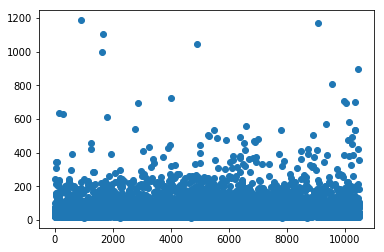

In [73]:
df_biased['word_count'] = df_biased['REVIEW_TEXT'].apply(lambda x: len(x.split()))
df_biased['word_count']
plt.scatter(df_biased['DOC_ID'],df_biased['word_count'])

/Users/anjalid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


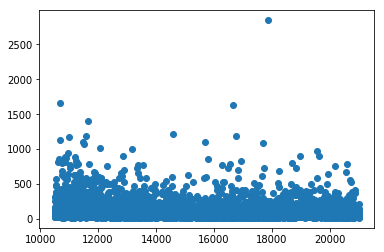

In [74]:
df_Unbiased['word_count'] = df_Unbiased['REVIEW_TEXT'].apply(lambda x: len(x.split()))
df_Unbiased['word_count']
plt.scatter(df_Unbiased['DOC_ID'],df_Unbiased['word_count'])

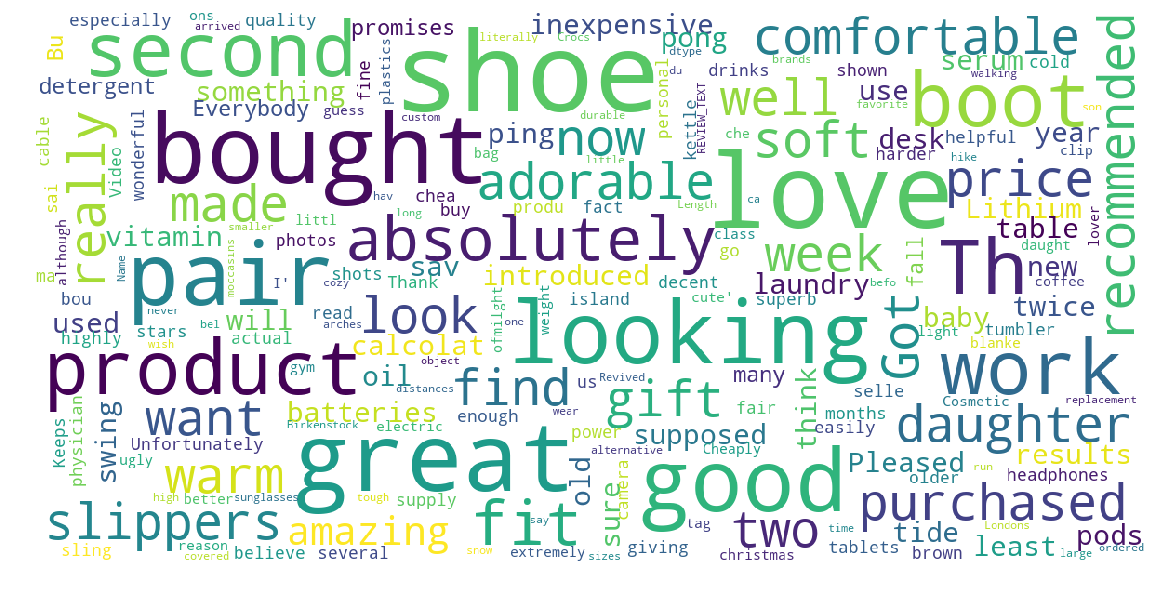

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["REVIEW_TEXT"])

In [75]:
diag_map = {'N':1, 'Y':0}
df_biased['VERIFIED_PURCHASE'] = df_biased['VERIFIED_PURCHASE'].map(diag_map)
df_biased['VERIFIED_PURCHASE']
df['VERIFIED_PURCHASE'] = df['VERIFIED_PURCHASE'].map(diag_map)

/Users/anjalid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
from textblob import TextBlob
blob = TextBlob("I have a lovely bunch of coconuts.")
for word, pos in blob.tags:
    print (word,pos)


**********************************************************************
  Resource averaged_perceptron_tagger not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')
  
  Attempted to load taggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle

  Searched in:
    - '/Users/anjalid/nltk_data'
    - '/Users/anjalid/anaconda3/nltk_data'
    - '/Users/anjalid/anaconda3/share/nltk_data'
    - '/Users/anjalid/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
feature_cols=['polarity','word_count','VERIFIED_PURCHASE']
X=df[feature_cols]
y=df.LABEL
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test,predicted_classes)
print(accuracy)

0.7870671513296346


/Users/anjalid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [83]:
from sklearn.svm import SVC
clf_SVM = SVC(gamma='auto')
clf_SVM.fit(X_train, y_train)

0    23
1    69
2    52
3    44
4    66
Name: word_count, dtype: int64

In [84]:
predicted_SVM=clf_SVM.predict(X_test)

In [86]:
accuracy_SVM = accuracy_score(y_test,predicted_SVM)
accuracy_SVM

0.790128180600727

In [87]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [88]:
predicted_knn=neigh.predict(X_test)
predicted_knn

array(['__label1__', '__label2__', '__label2__', ..., '__label2__',
       '__label1__', '__label2__'], dtype=object)

In [89]:
accuracy_knn = accuracy_score(y_test,predicted_knn)
accuracy_knn

0.7430648555576813